In [21]:
import sys 
import os
sys.path.append(os.path.abspath(".."))

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, decomposition, linear_model, model_selection, metrics, svm, ensemble
import re
import itertools
import pickle
sns.set(context='paper', style='whitegrid', color_codes=True, font_scale=1.8)
colorcycle = [(0.498, 0.788, 0.498),
              (0.745, 0.682, 0.831),
              (0.992, 0.753, 0.525),
              (0.220, 0.424, 0.690),
              (0.749, 0.357, 0.090),
              (1.000, 1.000, 0.600),
              (0.941, 0.008, 0.498),
              (0.400, 0.400, 0.400)]
sns.set_palette(colorcycle)
mpl.rcParams['figure.max_open_warning'] = 65
mpl.rcParams['figure.figsize'] = [12, 7]

from speclib import misc, plotting, loaders

%matplotlib inline 

In [22]:
fsdf = pd.read_msgpack('../../allan_data/morequestions_feature_space.msgpack')
qf = misc.QuestionCompleter(fsdf)
fsdf.head() 

,weekly_alcohol,weekday_weekend_alcohol,before_workday_alcohol,times_drunk_last_30_days_alcohol,binge_5_alcohol,binge_10_alcohol,times_very_drunk_alcohol,alcohol_weekend_alcohol,gender,frequent_smoke,volume_smoke,academic_skills_importance_homophily,social_study_friends_homophily,live_alone,bt_registered_mean
u0536,7.0,1.333333,0.0,2.0,0.0,0.0,0.0,3.0,1,0.0,0.0,0.0,3.0,1.0,0.0
u0794,6.0,0.000000,0.0,4.5,2.0,0.0,2.0,4.5,1,0.0,0.0,3.0,3.0,1.0,0.0
u0785,26.0,0.857143,0.0,4.5,5.0,5.0,4.5,6.0,0,1.0,0.0,1.0,3.0,0.0,0.0
u0779,0.0,0.000000,0.0,3.0,1.0,0.0,1.0,1.0,1,0.0,0.0,1.0,3.0,1.0,0.0
u0159,11.0,0.375000,1.0,2.0,1.0,0.0,0.0,4.5,1,0.0,0.0,1.0,3.0,1.0,0.0


In [23]:
bddf = pd.read_msgpack('../../allan_data/bluetooth_daily.msgpack')
bddf.head() 

,u0182,u1015,u0778,u0933,u0256,u0659,u0719,u0709,u0748,u0045,...,u0912,u0392,u0060,u0125,u0854,u0404,u0202,u0353,u0382,u0188
2013-12-10,27.0,1.0,24.0,222.0,0.0,0.0,104.0,0.0,0.0,66.0,...,96.0,0.0,0.0,66.0,145.0,65.0,104.0,403.0,96.0,71.0
2013-12-11,60.0,0.0,16.0,269.0,0.0,0.0,131.0,0.0,0.0,94.0,...,87.0,0.0,0.0,68.0,176.0,44.0,92.0,462.0,176.0,140.0
2013-12-12,67.0,0.0,16.0,177.0,0.0,0.0,130.0,0.0,0.0,68.0,...,83.0,0.0,0.0,40.0,176.0,30.0,76.0,458.0,183.0,156.0
2013-12-13,80.0,0.0,16.0,176.0,0.0,0.0,112.0,0.0,0.0,64.0,...,112.0,0.0,0.0,32.0,176.0,16.0,64.0,512.0,192.0,160.0
2013-12-14,80.0,0.0,16.0,176.0,0.0,0.0,112.0,0.0,0.0,64.0,...,112.0,0.0,0.0,32.0,176.0,16.0,64.0,512.0,192.0,160.0


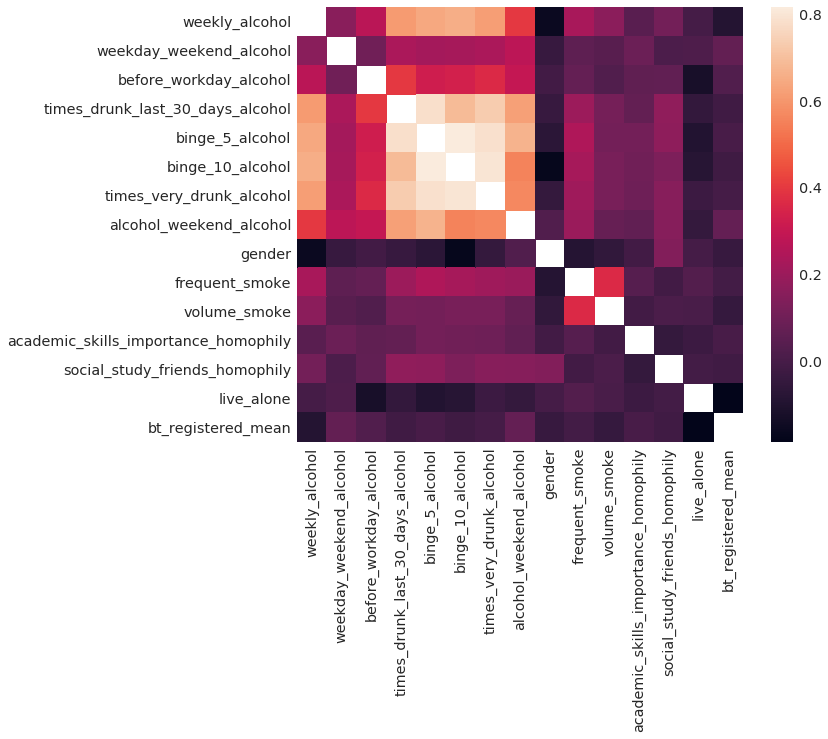

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))
fsdf_corr = fsdf.corr()
fsdf_corr = fsdf_corr.replace(1.0, np.NaN) 

sns.heatmap(fsdf_corr)

In [25]:
bt_registered_mean = fsdf.bt_registered_mean.values.copy()
fs_no_gender = fsdf.drop([qf.bt_registered_mean, qf.gender], axis='columns').values.copy() 

In [26]:
fs_no_gender = preprocessing.scale(fs_no_gender) 

In [27]:
pca = decomposition.PCA()

In [28]:
fs_no_gender_pca = pca.fit_transform(fs_no_gender)

In [29]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(fs_no_gender, bt_registered_mean, test_size=0.3)

In [30]:
lin_reg = linear_model.LinearRegression()

In [31]:
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [32]:
y_pred = lin_reg.predict(X_test) 

In [33]:
sqDev = lambda pred, test: ((pred - test)**2).mean() 

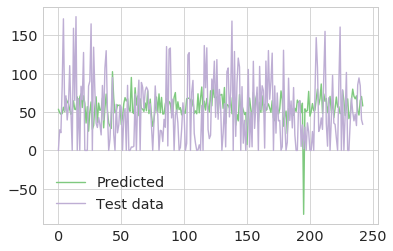

In [34]:
fig, ax = plt.subplots()
ax.plot(y_pred, label='Predicted')
ax.plot(y_test, label='Test data')
ax.legend() 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
1972.0571705534994

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
1898.248420874551

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
2379.869588379094



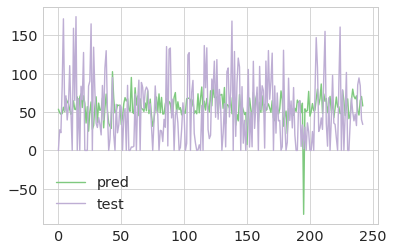

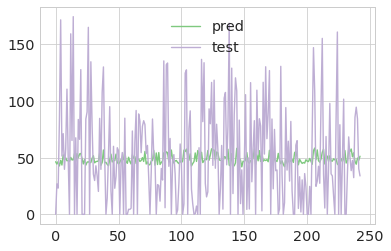

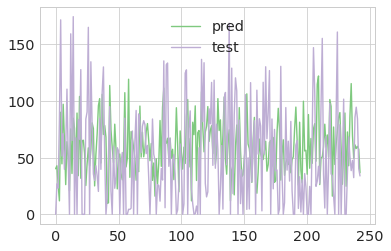

In [35]:
for model in [linear_model.LinearRegression(), svm.SVR(), ensemble.RandomForestRegressor()]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model, sqDev(pred, y_test), sep='\n', end='\n\n') 
    fig, ax = plt.subplots()
    ax.plot(pred, label='pred')
    ax.plot(y_test, label='test')
    ax.legend() 

In [36]:
pca.explained_variance_ratio_

array([0.36795074, 0.10054575, 0.08317152, 0.07999224, 0.06952222,
       0.06823572, 0.06005834, 0.04960776, 0.04289115, 0.02870965,
       0.02265568, 0.01544726, 0.01121198])

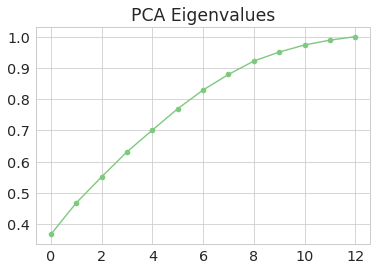

In [37]:
plt.plot(pca.explained_variance_ratio_.cumsum(), '-o')[0] 
plt.gca().set_title('PCA Eigenvalues');

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)
1936.2075360095203

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
1884.2309823278522

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
2352.561558873887



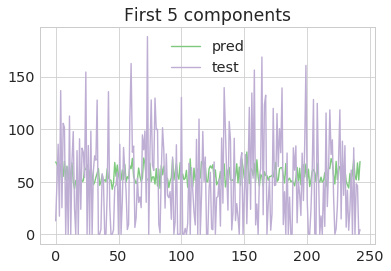

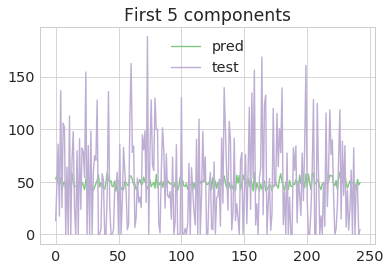

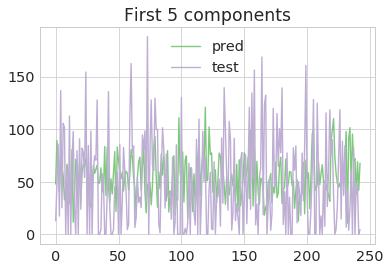

In [38]:
k = 5
X_train, X_test, y_train, y_test = model_selection.train_test_split(fs_no_gender_pca[:, :k], bt_registered_mean, test_size=0.3)

for model in [linear_model.LinearRegression(), svm.SVR(), ensemble.RandomForestRegressor()]:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(model, sqDev(pred, y_test), sep='\n', end='\n\n') 
    fig, ax = plt.subplots()
    ax.plot(pred, label='pred')
    ax.plot(y_test, label='test')
    ax.set_title(f"First {k} components")
    ax.legend() 

In [51]:
target_corr = fsdf.drop('bt_registered_mean', axis=1).corrwith(fsdf['bt_registered_mean']).sort_values(ascending=False)

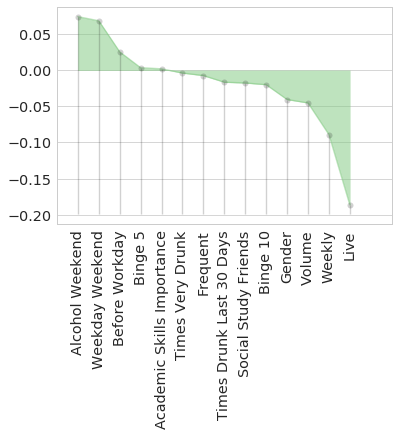

In [101]:
ax = target_corr.plot.area(stacked=False)
ax.plot(np.arange(len(target_corr)), target_corr, '.', color='k', alpha=0.2, markersize=12)
ax.set_xticks(np.arange(len(target_corr)))
ax.vlines(ax.get_xticks(), min(ax.get_ylim()), target_corr, alpha=0.2)
ax.set_xticklabels(target_corr.index.str.replace(r'_[a-z]+?$', '').str.replace('_', ' ').str.title(), rotation=90)
ax.set_xbound([-1, len(target_corr)+1]) 
ax.grid(axis='x') 

In [40]:
fs_no_gender_pca.shape

(808, 13)

* Try to use data naively sampeled from participarting users' bluetooth


Do some bootstrapping, which means selecting two people that are together a lot of the time in the bluetooth data, and maybe also call data, and compare their data to data from two randomly selected persons… or just compare all combinations.

Project user question space onto first PCA vector and compare it?


In [134]:
out = (fs_no_gender @ pca.components_) 

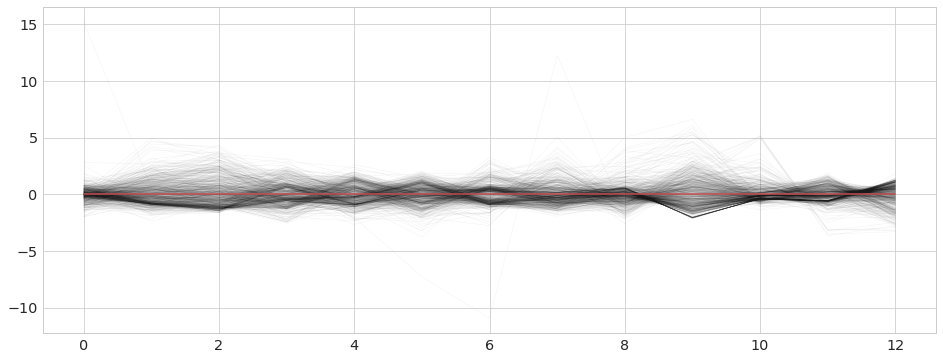

In [147]:
fig, ax = plt.subplots(figsize=(16, 6))
for vec in out:
    ax.plot(vec, color='k', alpha=0.05, lw=0.5)
ax.plot(out.mean(axis=0), color='r', lw=1.5)


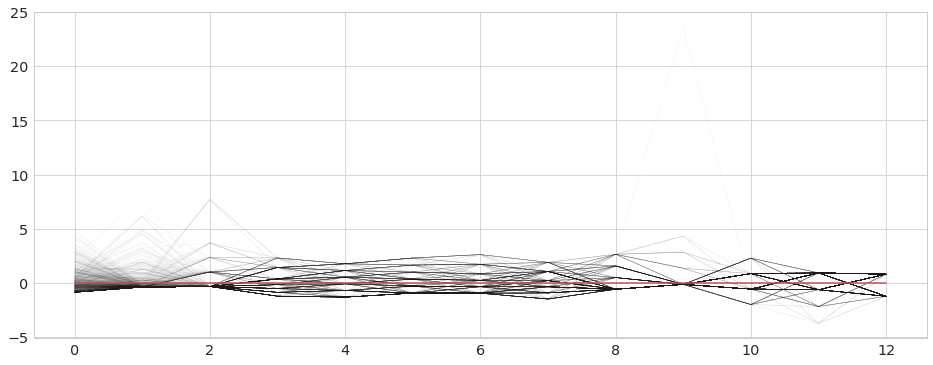

In [149]:
fig, ax = plt.subplots(figsize=(16, 6))
for vec in fs_no_gender:
    ax.plot(vec, color='k', alpha=0.05, lw=0.5)
ax.plot(fs_no_gender.mean(axis=0), color='r', lw=1.5)


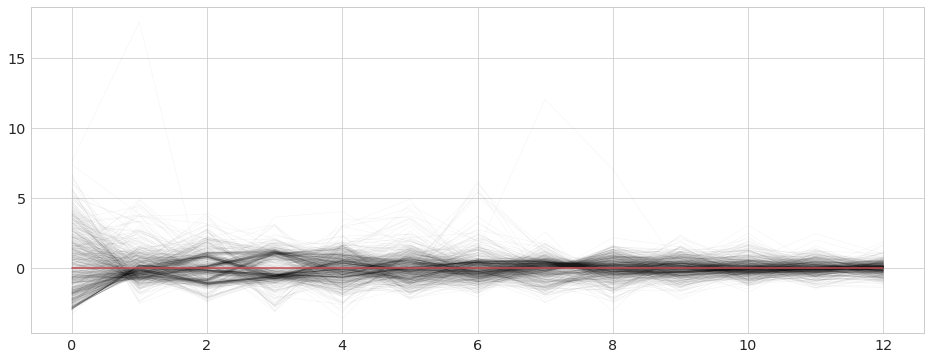

In [150]:
fig, ax = plt.subplots(figsize=(16, 6))
for vec in fs_no_gender_pca:
    ax.plot(vec, color='k', alpha=0.05, lw=0.5)
ax.plot(fs_no_gender_pca.mean(axis=0), color='r', lw=1.5)
